In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
data=pd.read_csv('scanner_data.csv')
data

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88
...,...,...,...,...,...,...,...,...
131701,131702,04/07/2016,20203,32900,IEV,FO112,3.0,6.46
131702,131703,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50
131703,131704,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19
131704,131705,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      131706 non-null  int64  
 1   Date            131706 non-null  object 
 2   Customer_ID     131706 non-null  int64  
 3   Transaction_ID  131706 non-null  int64  
 4   SKU_Category    131706 non-null  object 
 5   SKU             131706 non-null  object 
 6   Quantity        131706 non-null  float64
 7   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 8.0+ MB


In [4]:
data['Date']=data['Date'].astype('datetime64[ns]')
data

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,2016-02-01,2547,1,X52,0EM7L,1.0,3.13
1,2,2016-02-01,822,2,2ML,68BRQ,1.0,5.46
2,3,2016-02-01,3686,3,0H2,CZUZX,1.0,6.35
3,4,2016-02-01,3719,4,0H2,549KK,1.0,5.59
4,5,2016-02-01,9200,5,0H2,K8EHH,1.0,6.88
...,...,...,...,...,...,...,...,...
131701,131702,2016-04-07,20203,32900,IEV,FO112,3.0,6.46
131702,131703,2016-04-07,20203,32900,N8U,I36F2,1.0,4.50
131703,131704,2016-04-07,20203,32900,U5F,4X8P4,1.0,5.19
131704,131705,2016-04-07,20203,32900,0H2,ZVTO4,1.0,4.57


In [5]:
data.drop(columns='Unnamed: 0',inplace=True)
data

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,2016-02-01,2547,1,X52,0EM7L,1.0,3.13
1,2016-02-01,822,2,2ML,68BRQ,1.0,5.46
2,2016-02-01,3686,3,0H2,CZUZX,1.0,6.35
3,2016-02-01,3719,4,0H2,549KK,1.0,5.59
4,2016-02-01,9200,5,0H2,K8EHH,1.0,6.88
...,...,...,...,...,...,...,...
131701,2016-04-07,20203,32900,IEV,FO112,3.0,6.46
131702,2016-04-07,20203,32900,N8U,I36F2,1.0,4.50
131703,2016-04-07,20203,32900,U5F,4X8P4,1.0,5.19
131704,2016-04-07,20203,32900,0H2,ZVTO4,1.0,4.57


In [6]:
data_daily=data.groupby('Date').sum()
data_daily

,Customer_ID,Transaction_ID,Quantity,Sales_Amount
Date,,,,
2016-01-02,1620617,1896805,482.75,4341.46
2016-01-03,1616766,3579179,497.00,4436.42
2016-01-04,4846347,6867307,553.00,4637.34
2016-01-05,1820535,3779664,217.00,1514.17
2016-01-06,5149729,9793228,572.66,4750.01
...,...,...,...,...
2016-12-27,4947929,20833477,397.00,3720.79
2016-12-28,4921693,20697883,421.00,3363.16
2016-12-29,6290006,24803663,614.00,3940.49


### 1-Sample Two-Tailed Penjualan Harian

In [7]:
data_daily.describe()

,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,3.630000e+02,3.630000e+02,363.000000,363.000000
mean,4.494132e+06,1.175180e+07,538.910273,4347.213829
std,2.163295e+06,8.453714e+06,202.031640,1715.470966
min,5.084740e+05,1.730500e+04,107.000000,503.880000
25%,2.360648e+06,4.957075e+06,374.665000,2958.190000
50%,4.846347e+06,1.059243e+07,563.000000,4683.000000
75%,6.107174e+06,1.668024e+07,690.250000,5565.010000
max,9.618223e+06,3.784991e+07,1211.500000,8650.640000


Apakah penjualan di toko tersebut rata-rata pendapatan hariannya sebesar 4347?

H0: Rata-rata pendapatan harian sebesar 4347,  $\mu$ = 4347

H1: Rata-rata pendapatan harian bukan sebesar 4347,  $\mu$ != 4347

In [8]:
pop=np.random.normal(data_daily['Sales_Amount'].mean(),data_daily['Sales_Amount'].std(),10000)

t,p=stats.ttest_1samp(data_daily.Sales_Amount,pop.mean())
print ("t-statistic:" + str(t))
print("p-value:" + str(p))

t-statistic:0.08396742186176558
p-value:0.9331287481069328


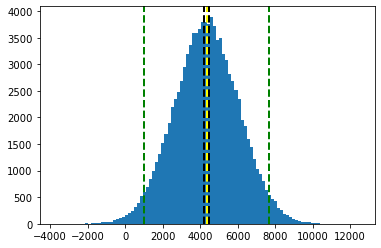

In [9]:
ci = stats.norm.interval(0.95, pop.mean(), pop.std())
plt.hist(pop, bins=100)
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)

plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2)

plt.axvline(pop.mean()+t*pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(pop.mean()-t*pop.std(), color='black', linestyle='dashed', linewidth=2)

### Two-Sample Independent Test

In [11]:
two_ML=data[data.SKU_Category=='2ML'].groupby('Date').sum()
two_ML

,Customer_ID,Transaction_ID,Quantity,Sales_Amount
Date,,,,
2016-01-02,10928,14721,4.0,16.80
2016-01-04,43707,61793,4.0,21.75
2016-01-05,34186,42132,2.0,12.23
2016-01-06,31413,54546,2.0,18.95
2016-01-07,63902,130002,5.0,29.99
...,...,...,...,...
2016-12-27,91678,319714,6.0,30.33
2016-12-28,24448,128213,2.0,15.06
2016-12-29,78790,321308,5.0,29.85


In [62]:
two_ML.describe()

,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,351.000000,351.000000,351.000000,351.000000
mean,61208.039886,164712.065527,5.125356,31.967949
std,44702.010058,134309.651177,3.138919,20.474494
min,131.000000,377.000000,1.000000,2.920000
25%,24470.000000,49702.500000,3.000000,16.665000
50%,52768.000000,143872.000000,5.000000,29.600000
75%,88164.000000,251554.500000,7.000000,42.325000
max,298303.000000,631055.000000,19.000000,141.750000


In [63]:
X52=data[data.SKU_Category=='X52'].groupby('Date').sum()
X52

,Customer_ID,Transaction_ID,Quantity,Sales_Amount
Date,,,,
2016-01-03,16595,39624,4.0,25.29
2016-01-04,69936,77245,5.0,19.04
2016-01-05,10126,21091,1.0,4.74
2016-01-06,54874,109377,4.0,44.65
2016-01-07,73925,194943,6.0,47.31
...,...,...,...,...
2016-12-26,40255,255096,4.0,24.24
2016-12-27,75767,319438,5.0,40.13
2016-12-28,77275,320385,5.0,59.07


In [64]:
X52.describe()

,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,356.000000,356.000000,356.000000,356.000000
mean,62037.896067,165334.025281,5.390449,35.868174
std,39395.571383,130435.928580,2.677358,20.521357
min,647.000000,388.000000,1.000000,3.220000
25%,31096.750000,61153.250000,3.000000,21.572500
50%,58725.500000,138887.000000,5.000000,33.215000
75%,86198.750000,241051.000000,7.000000,47.330000
max,236870.000000,949205.000000,15.000000,117.930000


Apakah performa penjualan 2ML dan X52 sama?

H0: $\mu$ Sales Amount 2ML = $\mu$ Sales Amount X52

H1: $\mu$ Sales Amount 2ML != $\mu$ Sales Amount X52

In [67]:
t,p=stats.ttest_ind(two_ML['Sales_Amount'],X52['Sales_Amount'])
print ("t-statistic:" + str(t))
print("p-value:" + str(p))

t-statistic:-2.5295592043233146
p-value:0.01163738042113982


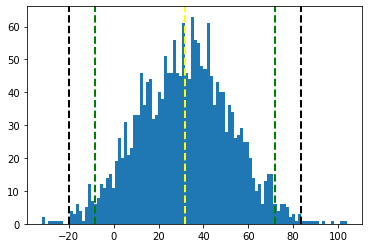

In [68]:
pop=np.random.normal(two_ML['Sales_Amount'].mean(), two_ML['Sales_Amount'].std(), 2000)
ci = stats.norm.interval(0.95, pop.mean(), pop.std())
plt.hist(pop, bins=100)
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2)
plt.axvline(pop.mean()+t*pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(pop.mean()-t*pop.std(), color='black', linestyle='dashed', linewidth=2)

### Two-Sample Dependent/Relative Test / Paired Test

H0: Penjualan 2ML bulan Januari = Februari

H1: Penjualan 2ML bulan Januari != Februari

In [22]:
t,p=stats.ttest_rel(two_ML.loc['2016-01']['Sales_Amount'],two_ML.loc['2016-02']['Sales_Amount'][:-1])
print ("t-statistic:" + str(t))
print("p-value:" + str(p))

t-statistic:-1.5449013720698253
p-value:0.13445609147460122


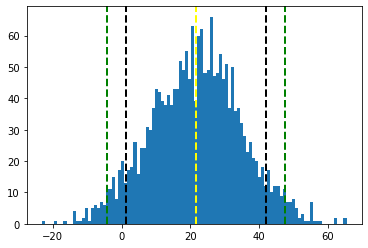

In [23]:
pop=np.random.normal(two_ML.loc['2016-01']['Sales_Amount'].mean(), two_ML.loc['2016-01']['Sales_Amount'].std(), 2000)
ci = stats.norm.interval(0.95, pop.mean(), pop.std())
plt.hist(pop, bins=100)
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2)
plt.axvline(pop.mean()+t*pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(pop.mean()-t*pop.std(), color='black', linestyle='dashed', linewidth=2)

## ANOVA TEST - multiple groups

In [74]:
Q4N=data[data.SKU_Category=='Q4N'].groupby('Date').sum()
Q4N

,Customer_ID,Transaction_ID,Quantity,Sales_Amount
Date,,,,
2016-01-02,15595,29567,6.0,63.84
2016-01-03,26106,69228,8.0,64.29
2016-01-04,100407,123479,8.0,93.11
2016-01-05,88215,189966,13.0,101.29
2016-01-06,67259,163541,8.0,73.95
...,...,...,...,...
2016-12-27,156595,639131,13.0,94.70
2016-12-28,47195,192373,3.0,41.05
2016-12-29,109989,578535,11.0,110.73


In [37]:
Q4N.describe()

count    2858.000000
mean       11.171568
std         7.592091
min         0.020000
25%         6.240000
50%         9.310000
75%        13.740000
max        64.260000
Name: Sales_Amount, dtype: float64

In [69]:
N8U=data[data.SKU_Category=='N8U'].groupby('Date').sum()
N8U

,Customer_ID,Transaction_ID,Quantity,Sales_Amount
Date,,,,
2016-01-02,156838,181924,40.0,172.46
2016-01-03,105385,227788,29.0,97.40
2016-01-04,423813,525348,35.0,142.57
2016-01-05,196313,422186,21.0,90.48
2016-01-06,265905,436455,17.0,70.18
...,...,...,...,...
2016-12-27,397984,1660883,30.0,142.79
2016-12-28,425231,1858379,33.0,117.81
2016-12-29,470264,2056550,34.0,127.67


In [71]:
U5F=data[data.SKU_Category=='U5F'].groupby('Date').sum()
U5F

,Customer_ID,Transaction_ID,Quantity,Sales_Amount
Date,,,,
2016-01-02,65290,59093,16.0,52.51
2016-01-03,58130,128839,25.0,68.81
2016-01-04,193834,293191,38.0,146.81
2016-01-05,683,21107,2.0,5.00
2016-01-06,234784,436224,25.0,117.97
...,...,...,...,...
2016-12-27,130730,575321,14.0,52.90
2016-12-28,71139,320489,7.0,31.80
2016-12-29,177265,706304,20.0,57.63


Apakah performa penjualan Q4N, X52, U5F, N8U, dan 2ML sama?

H0: rata-rata omzet harian kelima kategori produk sama

H1: rata-rata omzet harian kelima kategori produk berbeda

In [76]:
F,p=stats.f_oneway(Q4N.Sales_Amount, U5F.Sales_Amount, N8U.Sales_Amount)

print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  1.023131613520799e-49
reject null hypothesis


## Chi-Squared test

In [39]:
chi_df=pd.read_csv('https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/chi-test.csv')
chi_df

,Gender,Like Shopping?
0,Male,No
1,Female,Yes
2,Male,Yes
3,Female,Yes
4,Female,Yes
5,Male,Yes
6,Male,No
7,Female,No
8,Female,No


𝐻0: Tidak ada kaitan hobi belanja dengan jenis kelamin

𝐻𝑎: Ada kaitan hobi belanja dengan jenis kelamin


In [41]:
contingency_table=pd.crosstab(chi_df["Gender"],chi_df["Like Shopping?"])
contingency_table

Like Shopping?,No,Yes
Gender,,
Female,2,3
Male,2,2


In [42]:
stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.141, p=0.708
Probably independent
